# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/video_games_sales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('video_games_sales.csv')
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [7]:
df1 = df[['Genre','Platform','Critic_Score']]
df1.describe()

,Critic_Score
count,6536.000000
mean,7.213709
std,1.454079
min,1.000000
25%,6.400000
50%,7.500000
75%,8.300000
max,10.000000


In [8]:
df1[['Genre','Platform']].describe()

,Genre,Platform
count,55792,55792
unique,20,74
top,Misc,PC
freq,9476,10978


In [9]:
df2 = df[['Genre','Platform','Critic_Score']]
df2['Critic_Score'].fillna(df1.groupby('Genre')['Critic_Score'].transform('mean'), inplace=True)
df2.describe()

C:\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Critic_Score
count,55792.000000
mean,7.167378
std,0.555650
min,1.000000
25%,6.885799
50%,7.286833
75%,7.329188
max,10.000000


In [10]:
round(df1.groupby('Genre')['Critic_Score'].mean() - df2.groupby('Genre')['Critic_Score'].mean(),2)

Genre
Action              0.0
Action-Adventure    0.0
Adventure          -0.0
Board Game          0.0
Education           0.0
Fighting            0.0
MMO                 0.0
Misc               -0.0
Music              -0.0
Party              -0.0
Platform           -0.0
Puzzle             -0.0
Racing              0.0
Role-Playing       -0.0
Sandbox            -0.0
Shooter            -0.0
Simulation         -0.0
Sports              0.0
Strategy            0.0
Visual Novel        0.0
Name: Critic_Score, dtype: float64

H0: средняя оценка критиками спортивных игр >= 7.3 (критикам нравятся спортивные игры)

H1: средняя оценка критиками спортивных игр менее 7.3 (критикам не нравятся спортивные игры)

За alpha здесь и далее будем принимать 0.05

In [11]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_1samp(df2[df2['Genre'] == 'Sports']['Critic_Score'], 7.3)
print(result)

if (result.statistic < 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу, критикам не нравятся спортивные игры')
else:
    print('Не отвергаем нулевую нулевую гипотезу, критикам нравятся спортивные игры')

Ttest_1sampResult(statistic=-1.1664124506697269, pvalue=0.24350077933432607)
Не отвергаем нулевую нулевую гипотезу, критикам нравятся спортивные игры


In [12]:
df2 = df[['Genre','Platform','Critic_Score']]
df2['Critic_Score'].fillna(df1.groupby('Platform')['Critic_Score'].transform('mean'), inplace=True)
df2.describe()

C:\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Critic_Score
count,51498.000000
mean,7.426607
std,0.704821
min,1.000000
25%,7.156402
50%,7.439370
75%,7.644000
max,10.000000


In [13]:
round(df1.groupby('Platform')['Critic_Score'].mean() - df2.groupby('Platform')['Critic_Score'].mean(),2)

Platform
2600    NaN
3DO     NaN
3DS     0.0
5200    NaN
7800    NaN
       ... 
XBL    -0.0
XOne   -0.0
ZXS     NaN
iOS    -0.0
iQue    NaN
Name: Critic_Score, Length: 74, dtype: float64

H0: критикам одинаково нравятся игры на PC и на PS4

H1: у критиков имеются предпочтения или к играм на PC, или на PS4

In [14]:
result = st.ttest_ind(df2[df2['Platform'] == 'PC']['Critic_Score'], df2[df2['Platform'] == 'PS4']['Critic_Score'], equal_var=False)
print(result)
if (result.statistic < 0) & (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критикам больше нравятся игры на PS4')
elif (result.statistic > 0) & (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критикам больше нравятся игры на PC')
else:
    print('Не отвергаем нулевую нулевую гипотезу, критикам одинаково нравятся игры на PC и на PS4')

Ttest_indResult(statistic=-42.53911386045838, pvalue=6.798841329108563e-304)
Отвергаем нулевую гипотезу, критикам больше нравятся игры на PS4


In [15]:
df2 = df[['Genre','Platform','Critic_Score']]
df2['Critic_Score'].fillna(df1.groupby('Genre')['Critic_Score'].transform('mean'), inplace=True)
df2.describe()

C:\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Critic_Score
count,55792.000000
mean,7.167378
std,0.555650
min,1.000000
25%,6.885799
50%,7.286833
75%,7.329188
max,10.000000


In [16]:
round(df1.groupby('Genre')['Critic_Score'].mean() - df2.groupby('Genre')['Critic_Score'].mean(),2)

Genre
Action              0.0
Action-Adventure    0.0
Adventure          -0.0
Board Game          0.0
Education           0.0
Fighting            0.0
MMO                 0.0
Misc               -0.0
Music              -0.0
Party              -0.0
Platform           -0.0
Puzzle             -0.0
Racing              0.0
Role-Playing       -0.0
Sandbox            -0.0
Shooter            -0.0
Simulation         -0.0
Sports              0.0
Strategy            0.0
Visual Novel        0.0
Name: Critic_Score, dtype: float64

H0: критикам одинаково нравятся стрелялки и стратегии

H1: у критиков имеются предпочтения или к стрелялкам, или к стратегиям

In [17]:
result = st.ttest_ind(df2[df2['Genre'] == 'Shooter']['Critic_Score'], df2[df2['Genre'] == 'Strategy']['Critic_Score'], equal_var=False)
print(result)
if (result.statistic < 0) & (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критикам больше нравятся стратегии')
elif (result.statistic > 0) & (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критикам больше нравятся стрелялки')
else:
    print('Не отвергаем нулевую нулевую гипотезу, критикам одинаково нравятся стрелялки и стратегии')

Ttest_indResult(statistic=-11.421126886420177, pvalue=5.652623636098664e-30)
Отвергаем нулевую гипотезу, критикам больше нравятся стратегии


## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [18]:
import re

In [67]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
df['Message'] = df['Message'].str.lower()
df.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [73]:
# уберем все служебные символы
df['Message'] = [re.sub('[\W_]+',' ', text) for text in df['Message']]
df.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [62]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Тамара\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
df['Message'] = df['Message'].str.split(expand=False)
df.head()

,Category,Message
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, don, t, think, he, goes, to, usf, he,..."


In [76]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))
df['Message'] = [[word for word in text if word not in stopwords_set] for text in df['Message']]

In [77]:
df.head()


,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"


In [81]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
df['Message'] = [[wordnet_lemmatizer.lemmatize(word) for word in text] for text in df['Message']]
df['Message'] = [" ".join(text) for text in df['Message']]
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Тамара\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
df = pd.read_csv('spam.csv')
df1 = df['Message']
data = pd.merge(df1, tfidf_matrix,right_index=True,left_index=True)
data_class = df['Category']

In [104]:
data.shape


(5572, 8710)

In [105]:
data_class.shape

(5572,)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data_class, random_state=42, test_size=0.3)

In [112]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

In [113]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [129]:
y_pred=lr.predict(X_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr.predict(X_test))

0.9635167464114832

In [117]:
lr.coef_

array([[ 0.51952978,  0.94149716, -0.01591233, ..., -0.02342639,
         0.        ,  0.        ]])

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr.predict(X_test))
cm

array([[1446,    2],
       [  59,  165]], dtype=int64)

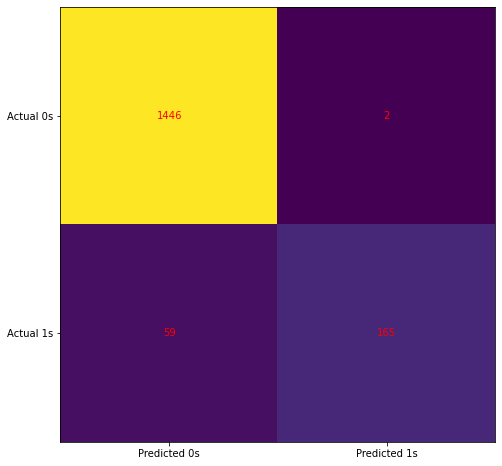

In [123]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(X_test)))


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       0.99      0.74      0.84       224

    accuracy                           0.96      1672
   macro avg       0.97      0.87      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [132]:
# смотрим разницу факта и прогноза
y_pr = []
for el in y_pred.flat:
    y_pr.append(el)
se = pd.Series(y_pr)
res = pd.merge(df1,pd.DataFrame(y_test),right_index=True,left_index=True)
res['category_pred'] = se.values
res['category_pred'] = res['category_pred'].astype('category')
res


,Message,Category,category_pred
8,WINNER!! As a valued network customer you have...,spam,ham
12,URGENT! You have won a 1 week FREE membership ...,spam,ham
15,"XXXMobileMovieClub: To use your credit, click ...",spam,ham
17,Eh u remember how 2 spell his name... Yes i di...,ham,ham
19,England v Macedonia - dont miss the goals/team...,spam,ham
...,...,...,...
5558,"Sorry, I'll call later",ham,ham
5561,Get me out of this dump heap. My mom decided t...,ham,spam
5565,Huh y lei...,ham,ham
5567,This is the 2nd time we have tried 2 contact u...,spam,spam


In [134]:
res[res['Category'] != res['category_pred']]

,Message,Category,category_pred
8,WINNER!! As a valued network customer you have...,spam,ham
12,URGENT! You have won a 1 week FREE membership ...,spam,ham
15,"XXXMobileMovieClub: To use your credit, click ...",spam,ham
19,England v Macedonia - dont miss the goals/team...,spam,ham
47,"Fair enough, anything going on?",ham,spam
...,...,...,...
5446,I am back. Good journey! Let me know if you ne...,ham,spam
5450,Sac needs to carry on:),ham,spam
5457,Arun can u transfr me d amt,ham,spam
5524,You are awarded a SiPix Digital Camera! call 0...,spam,ham
